<a href="https://colab.research.google.com/github/jssaini7815/Basic-Python/blob/main/Titanic_LogisticRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
%matplotlib inline
titanic_data=pd.read_csv('/content/drive/MyDrive/titanic.csv')

In [3]:
titanic_data.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


In [5]:
print("# of passengers in original data: "+str(len(titanic_data.index)))

# of passengers in original data: 887


In [ ]:
# Analyzing Data 
# Creating different plot to check relationship  between  variables

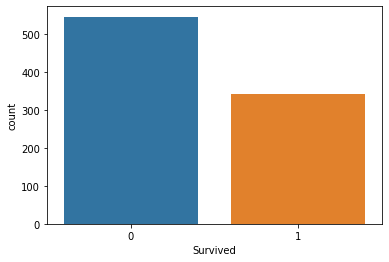

In [8]:
sns.countplot(x='Survived',data=titanic_data )

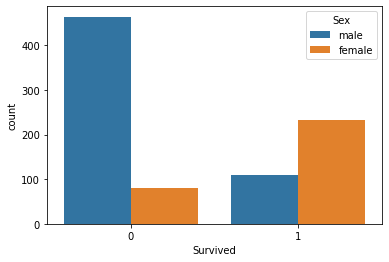

In [9]:
sns.countplot(x='Survived',hue='Sex',data=titanic_data)

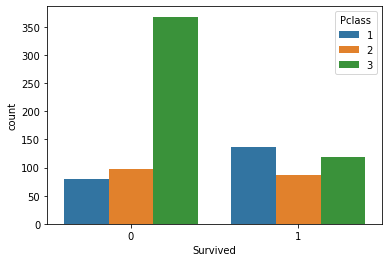

In [10]:
sns.countplot(x='Survived',hue="Pclass",data=titanic_data)

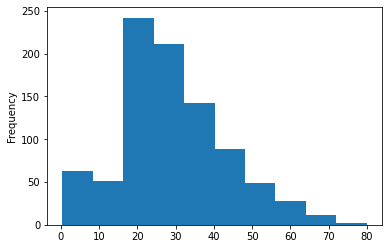

In [11]:
titanic_data['Age'].plot.hist()

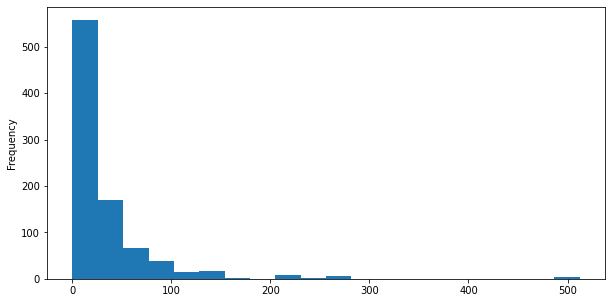

In [12]:
titanic_data['Fare'].plot.hist(bins=20,figsize=(10,5))

In [13]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887 entries, 0 to 886
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Survived                 887 non-null    int64  
 1   Pclass                   887 non-null    int64  
 2   Name                     887 non-null    object 
 3   Sex                      887 non-null    object 
 4   Age                      887 non-null    float64
 5   Siblings/Spouses Aboard  887 non-null    int64  
 6   Parents/Children Aboard  887 non-null    int64  
 7   Fare                     887 non-null    float64
dtypes: float64(2), int64(4), object(2)
memory usage: 55.6+ KB


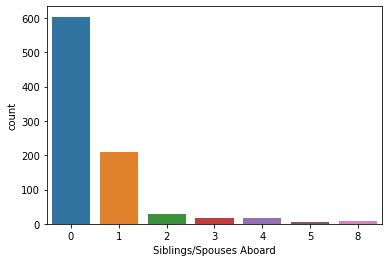

In [16]:
sns.countplot(x='Siblings/Spouses Aboard',data=titanic_data)

In [ ]:
#Data Wrangling : Clean the data by removing the Nan values and unnecessary columns in the dataset


In [17]:
# to check null or nan
titanic_data.isnull()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
882,False,False,False,False,False,False,False,False
883,False,False,False,False,False,False,False,False
884,False,False,False,False,False,False,False,False
885,False,False,False,False,False,False,False,False


In [18]:
titanic_data.isnull().sum()

Survived                   0
Pclass                     0
Name                       0
Sex                        0
Age                        0
Siblings/Spouses Aboard    0
Parents/Children Aboard    0
Fare                       0
dtype: int64

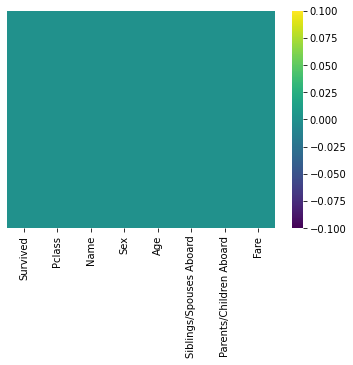

In [22]:
sns.heatmap(titanic_data.isnull(),yticklabels=False,cmap='viridis')

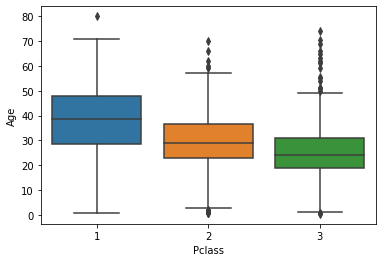

In [23]:
sns.boxplot(x="Pclass",y="Age",data=titanic_data)

In [24]:
titanic_data.head(5)

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


In [ ]:
titanic_data.drop('Cabin',axis=1,inplace=True) 

In [26]:
titanic_data.dropna(inplace=True)

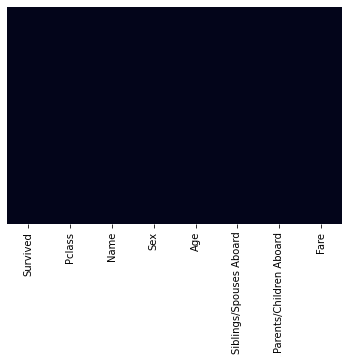

In [27]:
sns.heatmap(titanic_data.isnull(),yticklabels=False,cbar=False)

In [28]:
titanic_data.isnull().sum()

Survived                   0
Pclass                     0
Name                       0
Sex                        0
Age                        0
Siblings/Spouses Aboard    0
Parents/Children Aboard    0
Fare                       0
dtype: int64

In [29]:
titanic_data.head(2)

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833


In [33]:
#No string values in input value so we used dummy variable
sex=pd.get_dummies(titanic_data['Sex'],drop_first=True)
sex.head(5)

,male
0,1
1,0
2,0
3,0
4,1


In [ ]:
embark=pd.get_dummies(titanic_data['Embarked'],drop_first=True)
embark.head(5)

In [36]:
Pcl=pd.get_dummies(titanic_data['Pclass'],drop_first=True)

In [ ]:
titanic_data=pd.concat([titanic_data,sex,embark,Pcl],axis=1)

In [ ]:
titanic_data.drop(['Sex',"Name"],axis=1,inplace=True)

In [41]:
titanic_data.head()

,Survived,Pclass,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,1,3,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,0,3,35.0,0,0,8.0500


In [ ]:
# train and test data 
# build the model on the train data and predict the output on the test data


In [42]:
# Train Data
x=titanic_data.drop('Survived',axis=1)
y=titanic_data['Survived']

In [45]:
pip install scipy

In [48]:
pip install sklearn

In [50]:
from sklearn.model_selection import train_test_split

In [51]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [53]:
X_train
X_test

,Pclass,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
296,1,47.0,0,0,30.5000
682,2,25.0,1,2,41.5792
535,3,69.0,0,0,14.5000
644,1,56.0,0,0,35.5000
623,2,57.0,0,0,12.3500
...,...,...,...,...,...
388,1,36.0,1,2,120.0000
426,3,32.0,0,0,8.0500
368,1,25.0,1,0,55.4417
405,2,3.0,1,1,18.7500


In [54]:
from sklearn.linear_model import LogisticRegression 

In [55]:
logmodel=LogisticRegression()

In [56]:
logmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [58]:
predictions=logmodel.predict(X_test)

In [59]:
from sklearn.metrics import classification_report

In [60]:
classification_report(y_test,predictions)

'              precision    recall  f1-score   support\n\n           0       0.71      0.84      0.77       166\n           1       0.62      0.44      0.51       101\n\n    accuracy                           0.69       267\n   macro avg       0.66      0.64      0.64       267\nweighted avg       0.68      0.69      0.67       267\n'

In [61]:
from sklearn.metrics import confusion_matrix

In [62]:
confusion_matrix(y_test,predictions)

array([[139,  27],
       [ 57,  44]])

In [64]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,predictions)

0.6853932584269663

In [ ]:
# SUV PREDICTIONS
# X=dataset.iloc[:,[2,3]].values
# y=dataset.iloc[:,4].values
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.25,random_state=0)

In [ ]:
from sklearn.preprocessing import StandardScaler
#large scale down to test and train
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)
form sklearn.linear_model import LogisticRegression
classifier=LogisticRegression(random_state=0)
classifier.fit(X_train,y_train)

In [ ]:
y_pred=classifier.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)*100